GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …


Performance Summary:
+---+----------------------+--------------------+
|   |        Metric        |       Value        |
+---+----------------------+--------------------+
| 0 | True Positives (TP)  |       134.0        |
| 1 | True Negatives (TN)  |       368.0        |
| 2 | False Positives (FP) |       181.0        |
| 3 | False Negatives (FN) |       105.0        |
| 4 | Sensitivity (Recall) | 0.5606694560669456 |
| 5 |     Specificity      | 0.6703096539162113 |
| 6 |  Balanced Accuracy   | 0.6154895549915784 |
| 7 |         AUC          | 0.6154895549915784 |
+---+----------------------+--------------------+

Performance Summary for Novartis dataset:
+---+----------------------+--------------------+
|   |        Metric        |       Value        |
+---+----------------------+--------------------+
| 0 | True Positives (TP)  |       159.0        |
| 1 | True Negatives (TN)  |       352.0        |
| 2 | False Positives (FP) |       197.0        |
| 3 | False Negatives (FN) |       

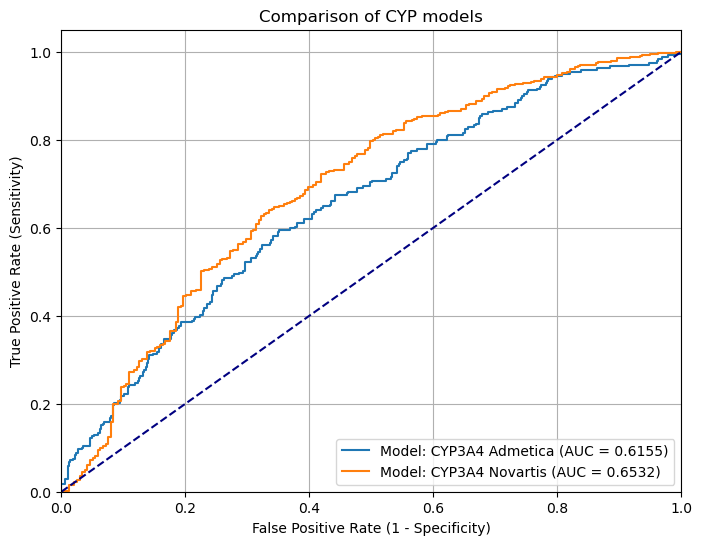

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …


Performance Summary:
+---+----------------------+---------------------+
|   |        Metric        |        Value        |
+---+----------------------+---------------------+
| 0 | True Positives (TP)  |        102.0        |
| 1 | True Negatives (TN)  |        137.0        |
| 2 | False Positives (FP) |        192.0        |
| 3 | False Negatives (FN) |        33.0         |
| 4 | Sensitivity (Recall) | 0.7555555555555555  |
| 5 |     Specificity      | 0.41641337386018235 |
| 6 |  Balanced Accuracy   | 0.5859844647078689  |
| 7 |         AUC          | 0.5859844647078689  |
+---+----------------------+---------------------+

Performance Summary for Novartis dataset:
+---+----------------------+--------------------+
|   |        Metric        |       Value        |
+---+----------------------+--------------------+
| 0 | True Positives (TP)  |        69.0        |
| 1 | True Negatives (TN)  |       236.0        |
| 2 | False Positives (FP) |        93.0        |
| 3 | False Negatives (

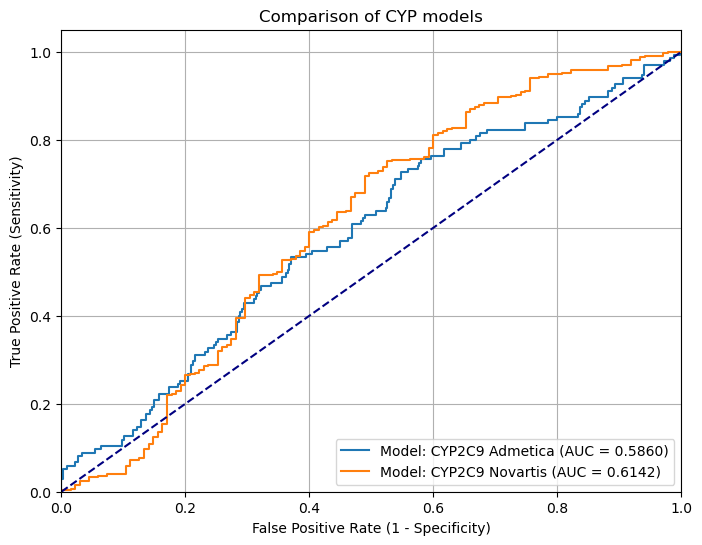

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …


Performance Summary:
+---+----------------------+--------------------+
|   |        Metric        |       Value        |
+---+----------------------+--------------------+
| 0 | True Positives (TP)  |        88.0        |
| 1 | True Negatives (TN)  |       329.0        |
| 2 | False Positives (FP) |       115.0        |
| 3 | False Negatives (FN) |       107.0        |
| 4 | Sensitivity (Recall) | 0.4512820512820513 |
| 5 |     Specificity      | 0.740990990990991  |
| 6 |  Balanced Accuracy   | 0.5961365211365212 |
| 7 |         AUC          | 0.596136521136521  |
+---+----------------------+--------------------+

Performance Summary for Novartis dataset:
+---+----------------------+---------------------+
|   |        Metric        |        Value        |
+---+----------------------+---------------------+
| 0 | True Positives (TP)  |        55.0         |
| 1 | True Negatives (TN)  |        403.0        |
| 2 | False Positives (FP) |        41.0         |
| 3 | False Negatives (FN) | 

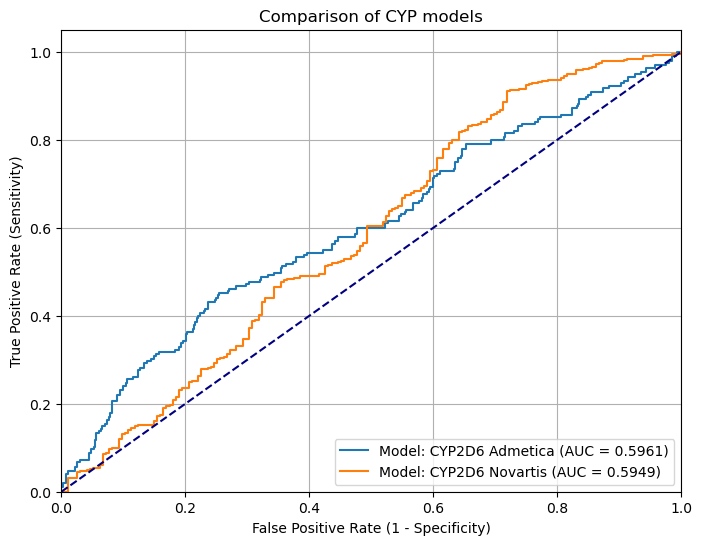

In [17]:
import os
import numpy as np
import pandas as pd
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score
from tabulate import tabulate
from typing import List, Dict
from chemprop import data, featurizers, models
from lightning import pytorch as pl

def load_datasets(chembl_type):
    """Load the datasets from specified CSV files based on ChEMBL type."""
    current_directory = os.getcwd()
    admetica_folder = os.path.abspath(os.path.join(current_directory, '..'))

    # Dynamically construct file paths for each ChEMBL type
    nx_path = os.path.join(current_directory, 'novartis', 'chembl', chembl_type, f'novartis_{chembl_type}_processed.csv')
    admetica_model_path = os.path.join(admetica_folder, f'ADMET/metabolism/cyp{chembl_type.lower()}-inhibitor/cyp{chembl_type.lower()}-inhibitor.ckpt')
    chembl_path = os.path.join(current_directory, 'novartis', 'chembl', chembl_type, f'ChEMBL_30_{chembl_type}_processed.csv')

    # Load datasets
    nx_dataset = pd.read_csv(nx_path)
    chembl_dataset = pd.read_csv(chembl_path)

    return nx_dataset, admetica_model_path, chembl_dataset

def load_model(checkpoint_path: str):
    """Load a pre-trained model from a checkpoint path."""
    try:
        return models.MPNN.load_from_checkpoint(checkpoint_path)
    except Exception as e:
        print(f"Error loading model from {checkpoint_path}: {e}")
        return None

def featurize_smiles(smiles_list: List[str]):
    """Convert SMILES strings to a dataset and return the dataloader."""
    test_data = [data.MoleculeDatapoint.from_smi(smi) for smi in smiles_list]
    featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()
    test_dset = data.MoleculeDataset(test_data, featurizer=featurizer)
    return data.build_dataloader(test_dset, shuffle=False)

def predict_property(model, dataloader):
    """Run inference on the provided model and dataloader."""
    with torch.inference_mode():
        trainer = pl.Trainer(
            logger=False,
            enable_progress_bar=True,
            accelerator="cpu",
            devices=1
        )
        test_preds = trainer.predict(model, dataloader)
        test_preds_flat = [item for sublist in test_preds for item in sublist]
    return test_preds_flat

def calculate_props_admetica(model_path, chembl_type, smiles_list):
    mpnn = load_model(model_path)
    if mpnn is None:
        return None

    test_loader = featurize_smiles(smiles_list)
    test_preds = predict_property(mpnn, test_loader)

    test_preds_list = [pred[0] for pred in test_preds]
    preds = pd.DataFrame({
        'SMILES': smiles_list,
        'Prediction': test_preds_list
    })
    return preds

def analyze_threshold_performance(y_true, y_pred_prob, threshold_step=0.1, nx=True):
    """
    Analyzes the performance of a binary classifier at various thresholds to determine
    the optimal threshold that maximizes balanced accuracy, and calculates AUC.

    Parameters:
        y_true (array-like): True class labels.
        y_pred_prob (array-like): Predicted probabilities for the positive class.
        threshold_step (float, optional): Step size for threshold evaluation (default is 0.1).
    
    Returns:
        dict: A dictionary containing the optimal threshold, performance metrics (TP, TN, FP, FN),
              sensitivity, specificity, balanced accuracy, and AUC score.
    """
    # Step 1: Compute ROC curve data (FPR, TPR, and thresholds)
    fpr, tpr, roc_thresholds = roc_curve(y_true, y_pred_prob)

    # Step 2: Calculate specificity at each threshold
    specificity = 1 - fpr
    sensitivity = tpr  # TPR is the same as recall

    # Step 3: Compute balanced accuracy at each threshold
    balanced_accuracy = (sensitivity + specificity) / 2

    # Step 4: Create a DataFrame to hold TP, TN, FP, FN for every threshold
    results = []
    max_threshold = np.ceil(y_pred_prob.max() * 10) / 10  # Round up to the nearest 0.1
    thresholds_to_evaluate = np.arange(0.0, max_threshold + threshold_step, threshold_step)  # Range of thresholds

    for threshold in thresholds_to_evaluate:
        if nx:
            y_pred = np.where(y_pred_prob >= threshold, 0, 1)
        else:
            y_pred = np.where(y_pred_prob >= threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Store the results
        results.append({
            'Threshold': threshold,
            'TP': tp,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'Sensitivity': tp / (tp + fn) if (tp + fn) > 0 else 0,
            'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
            'Balanced Accuracy': (tp / (tp + fn) + tn / (tn + fp)) / 2
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Step 5: Find the threshold that maximizes balanced accuracy
    optimal_idx_balanced_acc = np.argmax(results_df['Balanced Accuracy'])
    optimal_threshold_balanced_acc = results_df['Threshold'].iloc[optimal_idx_balanced_acc]

    # Step 6: Get optimal performance metrics
    optimal_results = results_df.iloc[optimal_idx_balanced_acc]

    # Step 7: Calculate AUC for the entire set of probabilities at the optimal threshold
    if nx:
        y_pred = np.where(y_pred_prob > optimal_threshold_balanced_acc, 0, 1)
    else:
        y_pred = np.where(y_pred_prob > optimal_threshold_balanced_acc, 1, 0)
    auc = roc_auc_score(y_true, y_pred)

    # Step 8: Create performance summary
    performance_summary = {
        'Metric': [
            #'Optimal Threshold',
            'True Positives (TP)',
            'True Negatives (TN)',
            'False Positives (FP)',
            'False Negatives (FN)',
            'Sensitivity (Recall)',
            'Specificity',
            'Balanced Accuracy',
            'AUC'
        ],
        'Value': [
            #optimal_threshold_balanced_acc,
            optimal_results['TP'],
            optimal_results['TN'],
            optimal_results['FP'],
            optimal_results['FN'],
            optimal_results['Sensitivity'],
            optimal_results['Specificity'],
            optimal_results['Balanced Accuracy'],
            auc
        ]
    }

    # Convert performance summary to DataFrame for tabulation
    performance_df = pd.DataFrame(performance_summary)

    # Print the performance summary in a nice table format
    if nx:
        print("\nPerformance Summary for Novartis dataset:")
    else:
        print("\nPerformance Summary:")
    print(tabulate(performance_df, headers='keys', tablefmt='pretty'))

    return {
        'Optimal Threshold': optimal_threshold_balanced_acc,
        'True Positives (TP)': optimal_results['TP'],
        'True Negatives (TN)': optimal_results['TN'],
        'False Positives (FP)': optimal_results['FP'],
        'False Negatives (FN)': optimal_results['FN'],
        'Sensitivity (Recall)': optimal_results['Sensitivity'],
        'Specificity': optimal_results['Specificity'],
        'Balanced Accuracy': optimal_results['Balanced Accuracy'],
        'AUC': auc,
        'fpr': fpr,
        'tpr': tpr 
    }

def compare_models_roc(y_true_1, y_pred_prob_1, label_1, y_true_2, y_pred_prob_2, label_2, threshold_step=0.1):
    """Compares two models by plotting their ROC curves and AUC scores on the same plot."""
    results_1 = analyze_threshold_performance(y_true_1, y_pred_prob_1, threshold_step, False)
    results_2 = analyze_threshold_performance(y_true_2, y_pred_prob_2, threshold_step, True)

    plt.figure(figsize=(8, 6))
    plt.plot(results_1['fpr'], results_1['tpr'], label=f'{label_1} (AUC = {results_1["AUC"]:.4f})')
    plt.plot(results_2['tpr'], results_2['fpr'], label=f'{label_2} (AUC = {results_2["AUC"]:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Comparison of CYP models')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def main():
    cyp_types = ['3A4','2C9', '2D6']
    
    for cyp in cyp_types:
        nx_dataset, admetica_model_path, chembl_dataset = load_datasets(cyp)
        smiles_list = chembl_dataset['molecule_smiles']

        y_true = chembl_dataset['Class']
        preds_nx = calculate_props_admetica(admetica_model_path, cyp, smiles_list)
        y_pred_prob_nx = nx_dataset['pred(CYP{}_pIC50)_log'.format(cyp)]
        y_pred_prob_admet = preds_nx['Prediction']

        # Compare the models
        compare_models_roc(y_true, y_pred_prob_admet, f'Model: CYP{cyp} Admetica', 
                           y_true, y_pred_prob_nx, f'Model: CYP{cyp} Novartis')

if __name__ == "__main__":
    main()